# > We want to see the distributions of the calculated descriptors
# for the considered parameters.

## >> The idea is that they have a reasonable "entropy" (no-localized).

In [1]:
!date && ls

Wed 10 Jul 2019 02:48:31 PM -03
contributions.ipynb    structures_teest.ipynb  test.csv		Untitled.ipynb
descriptor_hist.ipynb  symmetry_funcs.ipynb    Untitled1.ipynb


In [2]:
!grep "^import \|^from .*import " ../src/calc_descriptors.py

import numpy as np
import pandas as pd
import random
from scipy.linalg import norm
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys, argparse
import multiprocessing as mp
import sfuncs as sff
import funcs as ff


In [3]:
#%run -t ../src/calc_descriptors.py -ds "../data" -sample 301 -fo './test.csv'
%run -t ../src/calc_descriptors.py -ds "../data" -sample 301 -fo './test.csv'

Cargando: ../data/structures.csv ... OK!
Cargando: ../data/train.csv ... OK!
Armando struct_dict OK!
 [*] running for 301 molecules...
 > imol: 0/75
 > imol: 0/75
 > imol: 0/76
 > imol: 0/74
 > imol: 50/75
 > imol: 50/75
 > imol: 50/76
 > imol: 50/74
 ---> FINISHED!

IPython CPU timings (estimated):
  User   :      23.06 s.
  System :       2.12 s.
Wall time:     287.58 s.


In [4]:
plt.style.use('dark_background')

In [5]:
df.head()

molecule_name  atom_index  desc_g2ang_00  desc_g2ang_01  desc_g2ang_02  \
0  dsgdb9nsd_091927           0       0.550729       0.029077       6.981846   
1  dsgdb9nsd_091927           1       0.073774       0.000620      10.090813   
2  dsgdb9nsd_091927           2       0.546757       0.028691       7.086990   
3  dsgdb9nsd_091927           3       0.235448       0.002700       8.673119   
4  dsgdb9nsd_091927           4       0.334288       0.002733       4.968799   

   desc_g2ang_03  desc_g2ang_04  desc_g2ang_05  desc_g2rad_00  desc_g2rad_01  \
0       3.136001      69.609812      31.278836       2.898186       5.089626   
1       2.445538      99.846813      54.296313       4.120347       8.849743   
2       3.177153      69.566509      31.194079       2.907282       5.042920   
3       2.657097      92.303135      46.950761       3.787244       8.421595   
4       1.082105      70.152086      22.903100       1.614203       6.155353   

   desc_g2rad_02  desc_g2rad_03  
0       5.481368       1.187861  
1       2.839422       0.011636  
2       5.596118       1.122927  
3       3.707792       0.080532  
4       5.785053       0.923358

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 12 columns):
molecule_name    5475 non-null object
atom_index       5475 non-null int64
desc_g2ang_00    5475 non-null float64
desc_g2ang_01    5475 non-null float64
desc_g2ang_02    5475 non-null float64
desc_g2ang_03    5475 non-null float64
desc_g2ang_04    5475 non-null float64
desc_g2ang_05    5475 non-null float64
desc_g2rad_00    5475 non-null float64
desc_g2rad_01    5475 non-null float64
desc_g2rad_02    5475 non-null float64
desc_g2rad_03    5475 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 513.4+ KB


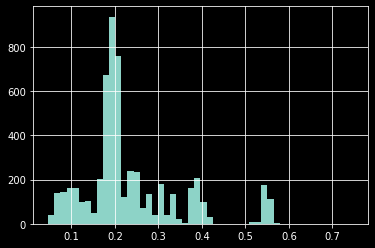

In [7]:
df["desc_g2ang_00"].hist(bins=50)

/home/jim/anaconda/envs/kgg_mole/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3325: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


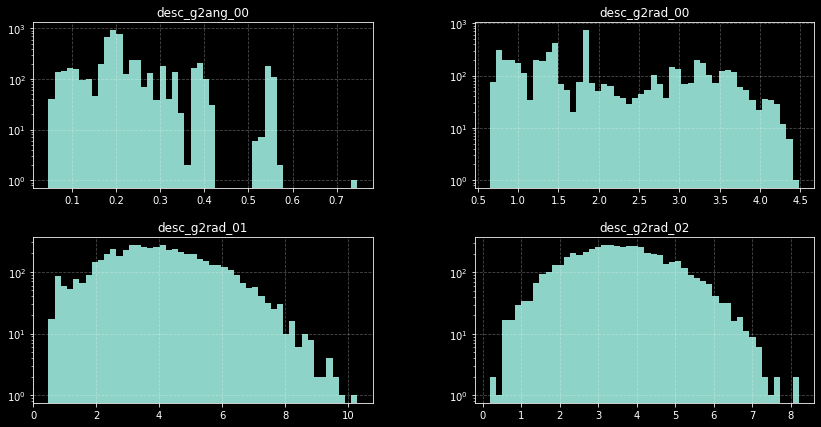

In [8]:
fig = plt.figure(figsize=(14, 7))
ax  = fig.add_subplot(221)
axes = df[["desc_g2ang_00", "desc_g2rad_00", "desc_g2rad_01", "desc_g2rad_02"]].hist(bins=50, ax=ax, log=1);
for _ax in axes.reshape(4): _ax.grid(ls='--', alpha=0.3)

In [9]:
!which python

/home/jim/anaconda/envs/kgg_mole/bin/python


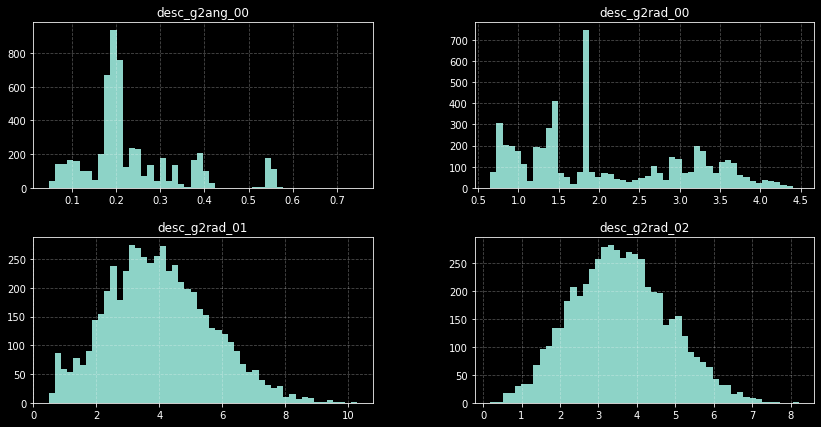

In [10]:
fig = plt.figure(figsize=(14, 7))
ax  = fig.add_subplot(111)
axes = df[["desc_g2ang_00", "desc_g2rad_00", "desc_g2rad_01", "desc_g2rad_02"]].hist(bins=50, ax=ax);
for _ax in axes.reshape(4): _ax.grid(ls='--', alpha=0.3)

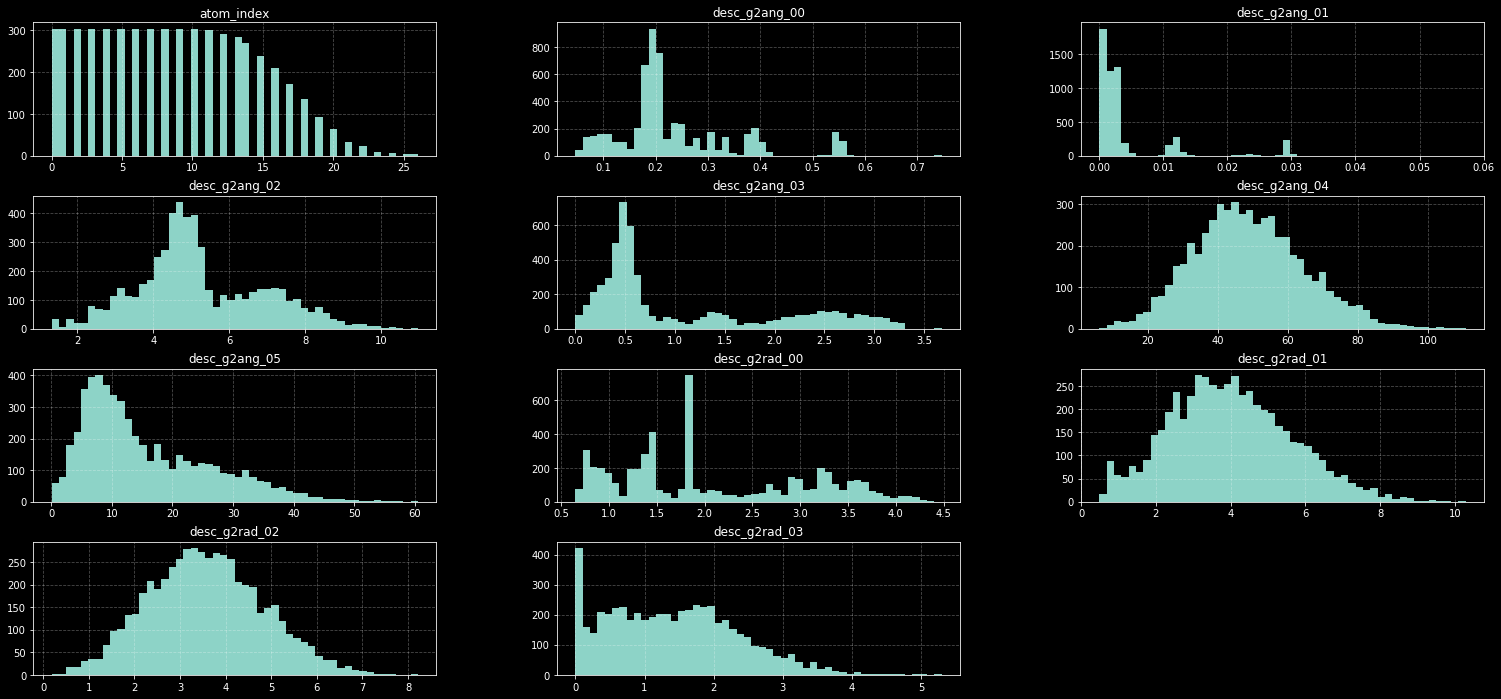

In [11]:
fig = plt.figure(figsize=(26, 12))
ax  = fig.add_subplot(111)
axes = df.hist(bins=50, ax=ax);
for _ax in axes.reshape(axes.size): _ax.grid(ls='--', alpha=0.3);